In [1]:

from sklearn.datasets import fetch_openml
from sklearn.metrics import silhouette_score
from itertools import permutations

import numpy as np
import pandas as pd

def load_dataset():
    X,y = fetch_openml('mnist_784', version=1, return_X_y=True)
    y = y.astype(int)
    X = X/255

    print(len(X))
    return X,y

def sub(X,y,partition):
    X=X[:int(len(X)*partition//1)]
    y=y[:int(len(y)*partition//1)]
    print(len(y))
    return X,y

In [2]:
from sklearn.decomposition import PCA
X,y= load_dataset()

70000


In [3]:
X_t,y_t=sub(X,y,.25)

17500


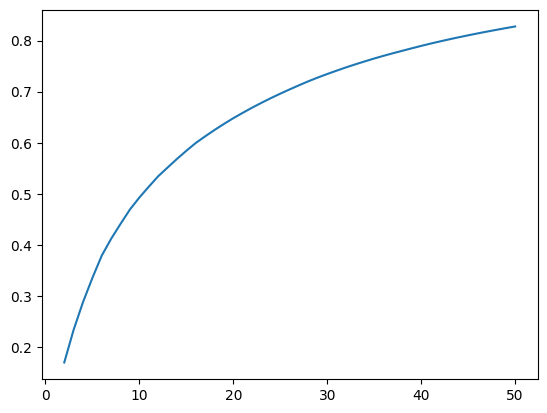

In [4]:
from matplotlib import pyplot as plt

n_components=50
pca=PCA(n_components=n_components)
pca.fit(X_t)
ks=np.arange(2,n_components+1)
plt.plot(ks,np.cumsum(pca.explained_variance_ratio_)[ks-1])
Xs=pca.transform(X_t)



In [5]:
from sklearn.cluster import MeanShift
from sklearn.model_selection import GridSearchCV

n_jobs=-1

param_grid = {"bandwidth" : [0.6, 1, 3, 4, 5]}
model = GridSearchCV(MeanShift(n_jobs=n_jobs), param_grid, scoring="rand_score", refit="rand_score", n_jobs=n_jobs, cv=5, error_score="raise")

In [ ]:
from time import time
from tqdm import tqdm

res=[]

pca_tune_dims=list(range(10,n_components+1,10))
pca_tune=[PCA(n_components=i).fit_transform(X_t) for i in pca_tune_dims]
for pci in tqdm(pca_tune):
    st=time()
    model.fit(pci,y_t)
    t=time()-st

    best_estimator = model.best_estimator_
    best_rand_score = model.best_score_
    best_params = model.best_params_
    n_cluster=best_estimator.cluster_centers_.shape[0]
    print(best_estimator, best_params, best_rand_score, t, n_cluster)
    res.append(best_estimator, best_params, best_rand_score, t, n_cluster)


  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
for pci in tqdm(pca_tune):
    st=time()
    model.fit(pca_tune,y_t)
    t=time()-st

    best_estimator = model.best_estimator_
    best_rand_score = model.best_score_
    best_params = model.best_params_
    n_cluster=best_estimator.cluster_centers_.shape[0]
    print(best_estimator, best_params, best_rand_score, t, n_cluster)
    res.append(best_estimator, best_params, best_rand_score, t, n_cluster)